<a href="https://colab.research.google.com/github/MarkStocksUK/White_Wine_Analysis/blob/main/White_Wine_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#pip install opendatasets

In [53]:
#pip install ucimlrepo


In [54]:
pip install pandas

Importing libraries and our checking our input directory.

In [55]:
#from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os

# fetch dataset
#wine_quality = fetch_ucirepo(id=186)
print(os.listdir("/content/mydata"))

['winequality-white.csv']


Read the csv data into a dataframe

In [56]:
wwdata = pd.read_csv("mydata/winequality-white.csv")

A quick look at the first couple of rows of data

In [57]:
print(wwdata.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6  


Lets investigate the dataframe and then look at the descriptive statisics of the columns.

In [58]:
wwdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [59]:
wwdata.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

Lets check for any missing data.

<Axes: >

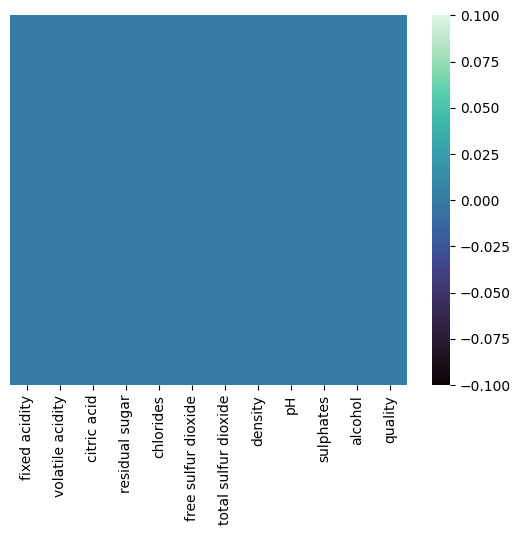

In [60]:
sns.heatmap(wwdata.isnull(), yticklabels=False, cbar=True, cmap='mako')

In [61]:
wwdata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Now lets check for any outliers. We can use box plots for this.

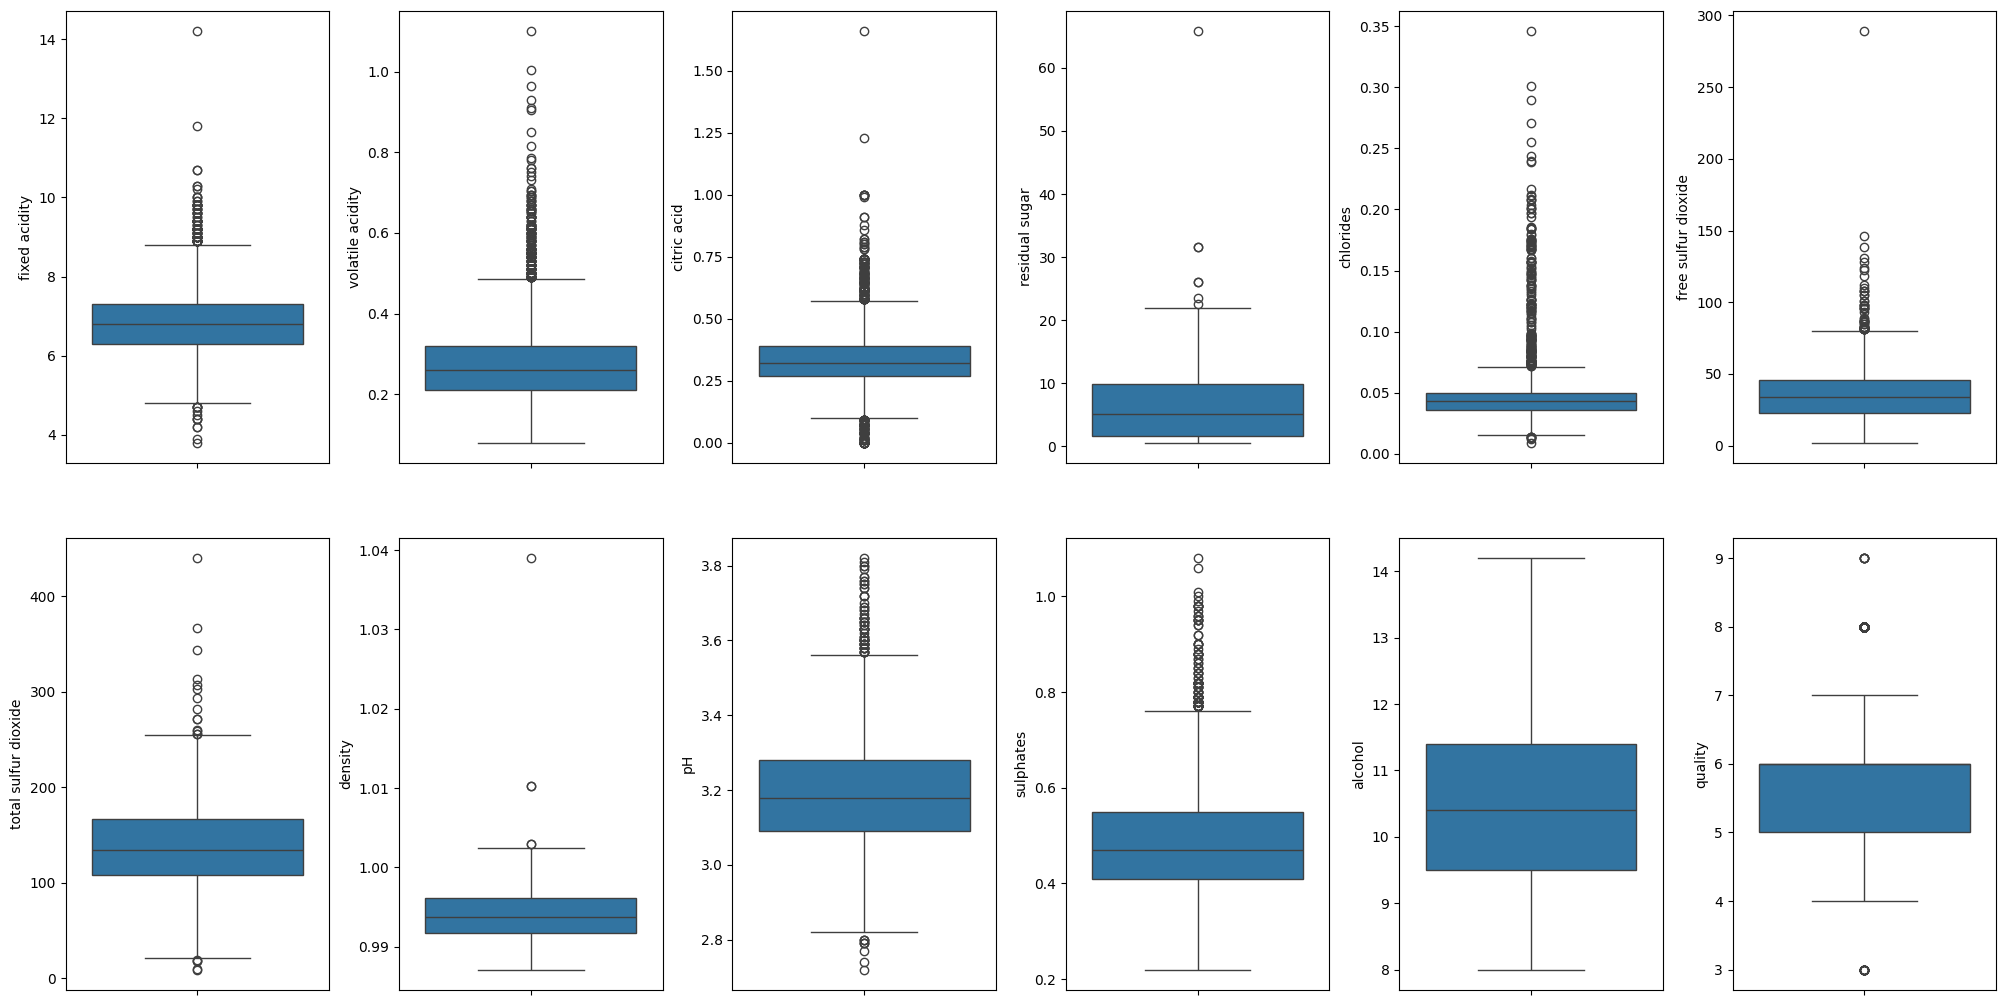

In [62]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for mycol, value in wwdata.items():
  sns.boxplot(y=mycol, data=wwdata, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Theres LOTS of outliers in our data so we need to clean these up. We will do this by adjusting outliers to be at the caps of each column.

In [63]:
def modify_outliers(df):
  df1 = df.copy()
  df = df._get_numeric_data()
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1

  lowerbound = Q1 -(1.5 * IQR)
  upperbound = Q3 +(1.5 * IQR)

  for col in df.columns:
      for i in range(0,len(df[col])):
          if df[col][i] < lowerbound[col]:
              df[col][i] = lowerbound[col]

          if df[col][i] > upperbound[col]:
              df[col][i] = upperbound[col]

  for col in df.columns:
      df1[col] = df[col]

  return(df1)

wwdata = modify_outliers(wwdata)

Streaming output truncated to the last 5000 lines.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upperbound[col]
<ipython-input-63-43e02cfbf58c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upperbound[col]
<ipython-input-63-43e02cfbf58c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upperbound[col]
<ipython-input-63-43e02cfbf58c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

Rechecking the boxplots to see if the adjustments have worked.

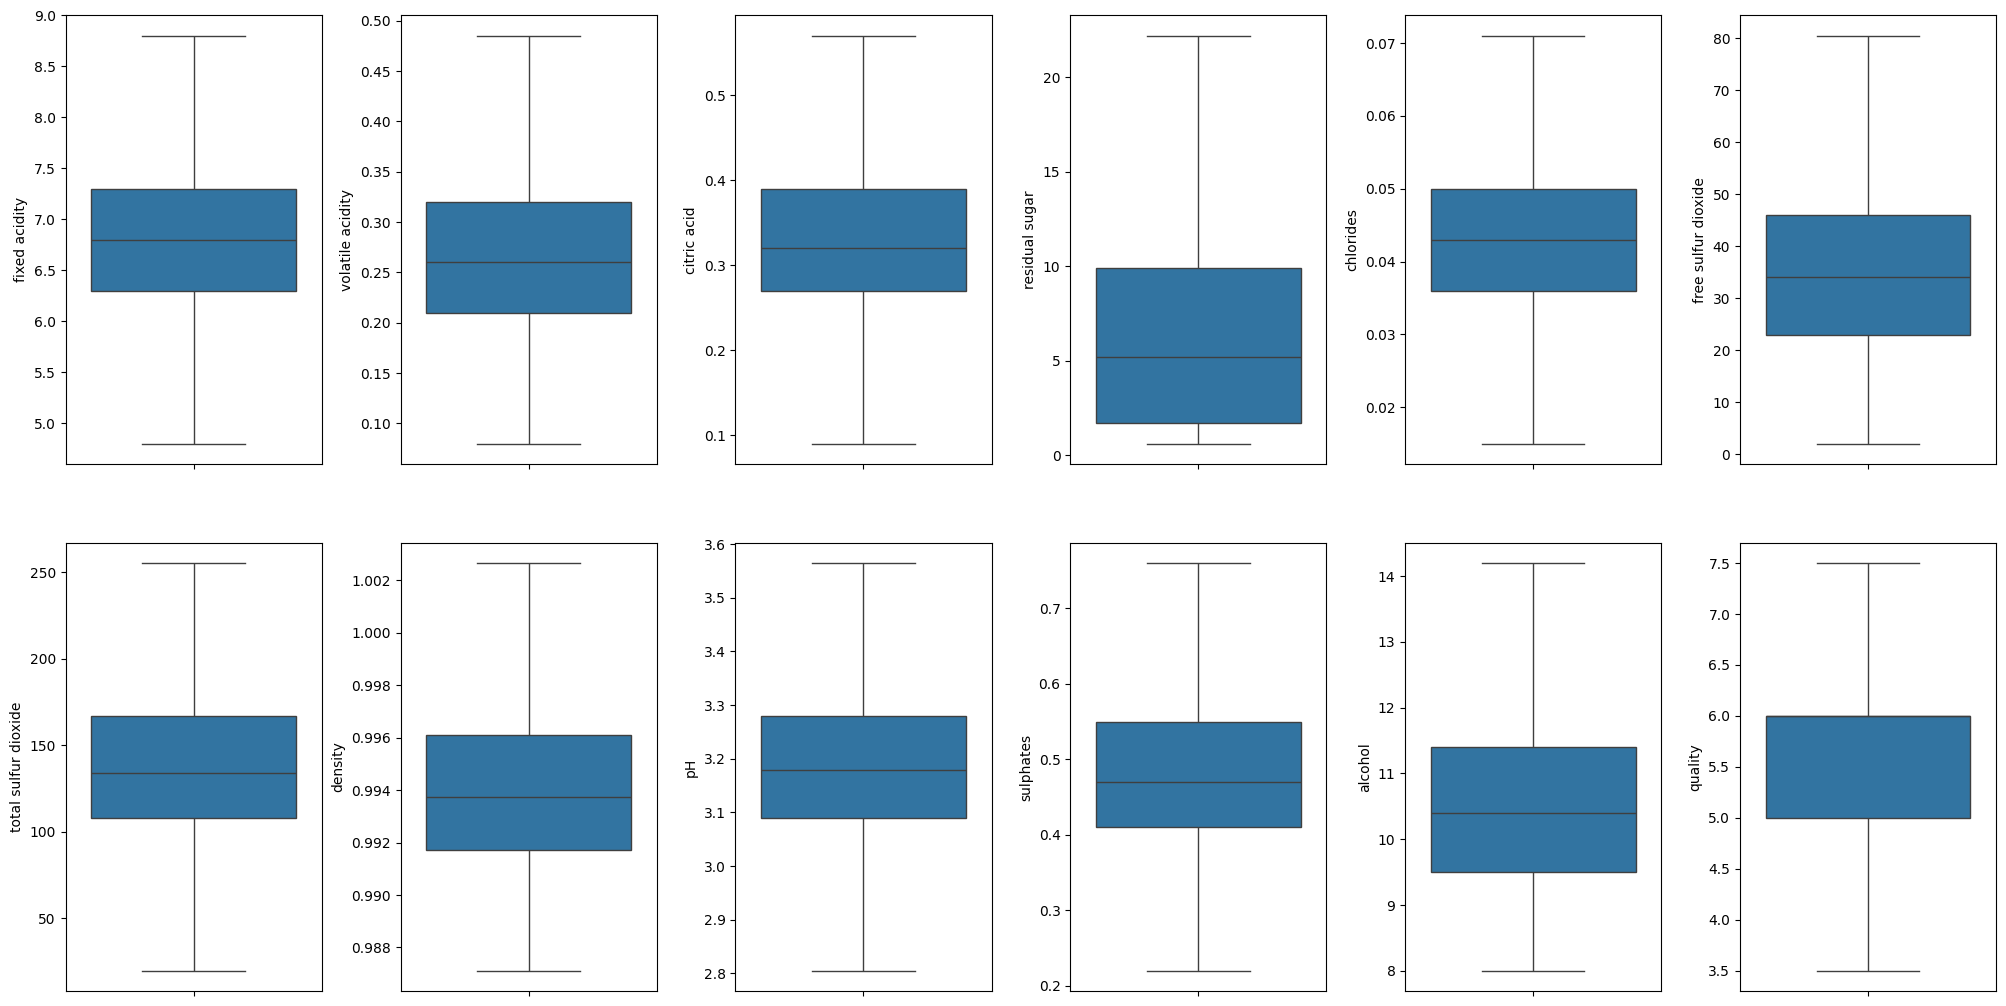

In [64]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for mycol, value in wwdata.items():
  sns.boxplot(y=mycol, data=wwdata, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Great, the outliers are now dealt with.

We will be looking to predict the quality of the wine, so lets investigate the data in that variable.

In [65]:
wwdata['quality'].unique()

array([6. , 5. , 7. , 7.5, 4. , 3.5])

<Axes: xlabel='quality', ylabel='count'>

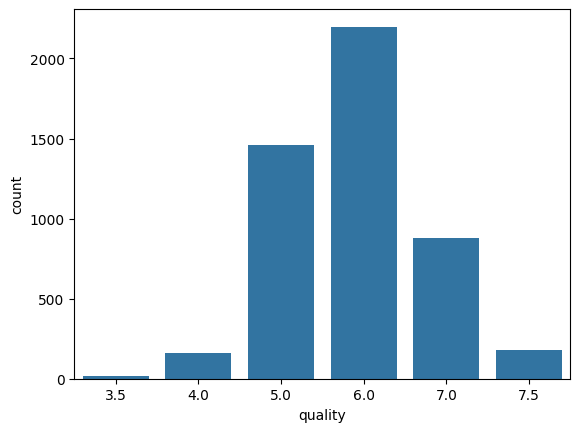

In [66]:
sns.countplot(x='quality', data=wwdata)

There are no wines rated at 1, 2 or 10.\
The majority of wines, score in the 5-7 range.\
Suggesting we can split the wines into 3 bands;


*   4 or lower = "Bad"
*   5-7 = "Average"
*   8 or higher = "Good"

# Finding correlations
lets start with some pairplots

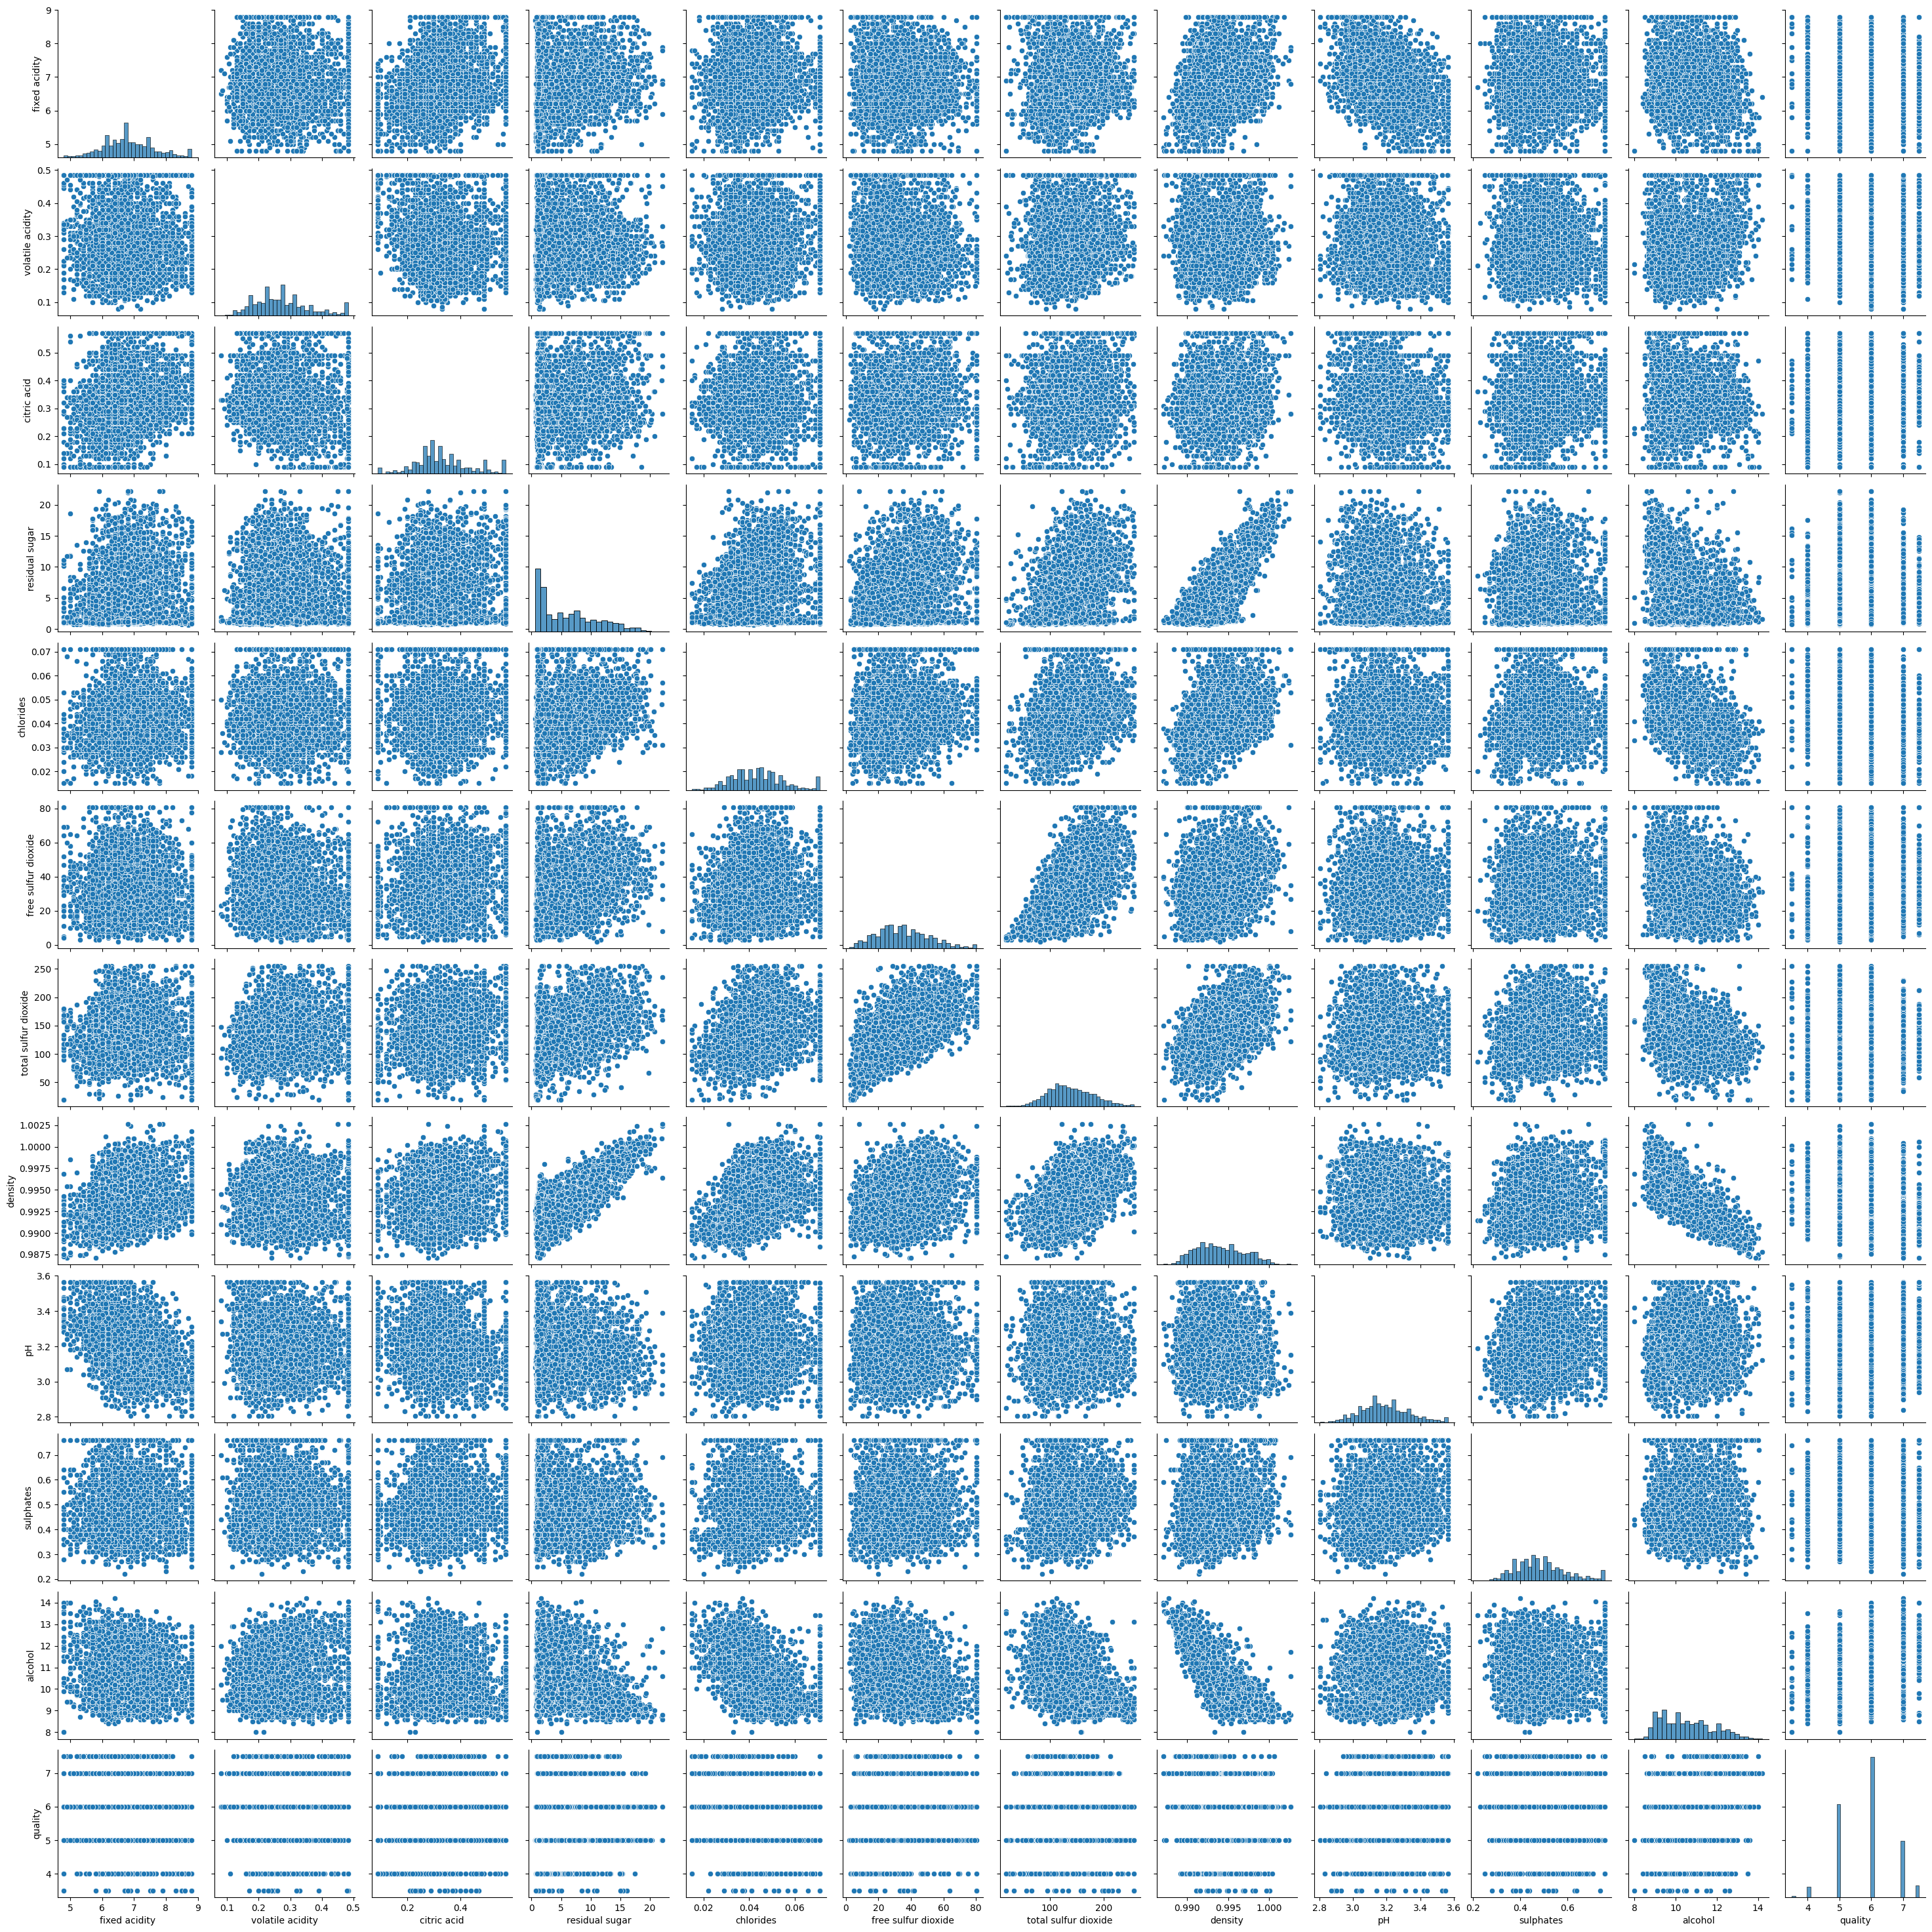

In [67]:
sns.pairplot(wwdata)